In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [115]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [116]:
data = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/dl-code/x_data_after_PCA.txt')

df = pd.DataFrame(data)

df.astype(int)
df.shape

(1000, 300)

In [87]:
data.shape

(1000, 300)

In [117]:
y_data = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/dl-code/myfile4.txt')

y_data.dtype
# df = pd.DataFrame(data)
y_data.shape

(1000,)

In [119]:
y_data.shape

(1000,)

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=0)

In [123]:
y_test.std()

10.713240571684238

In [90]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1]), name='Input_layer'))
    model.add(layers.Dense(64,activation = tf.nn.relu))
    model.add(layers.Dense(64, activation = tf.nn.relu))
    model.add(layers.Dense(1))


    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss = 'mse',
        optimizer = optimizer,
        metrics = ['mae','mse'])
    
    return model

In [91]:
model  = build_model()

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                19264     
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 23,489
Trainable params: 23,489
Non-trainable params: 0
_________________________________________________________________


In [93]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 1000 # Number of EPOCHS

# HISTORY Object which contains how the model learned
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 100)

# Training Values (Properties), Training Labels (Known Young's Moduli) 
history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.2, callbacks=[early_stop,PrintEpNum()])

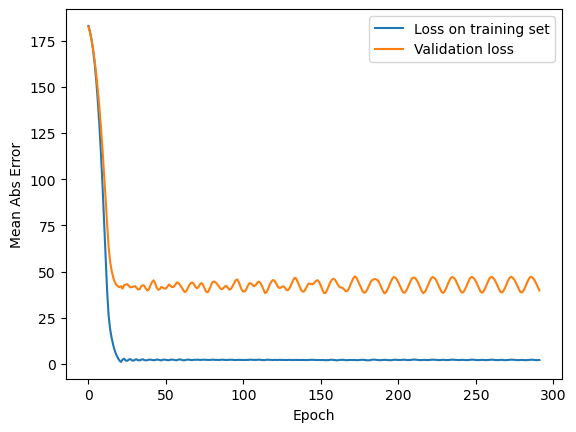

In [94]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mae']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Validation loss')
plt.legend()
plt.show()



In [95]:
loss,mae,mse = model.evaluate(X_test,y_test, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f}".format(mae))

Testing Set Mean Absolute Error: 39.32


32/32 [==============================] - 0s 694us/step


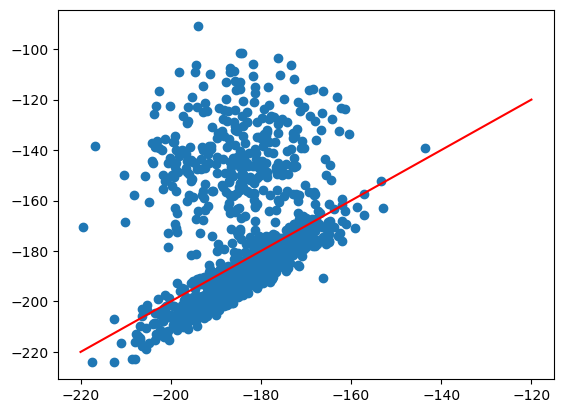

In [102]:
# predictions = np.loadtxt('')
# test_predictions = model.predict(X_test).flatten()
all_predictions = model.predict(data).flatten()

plt.scatter(y_data, all_predictions)
plt.plot([-220,-120],[-220,-120],'r')

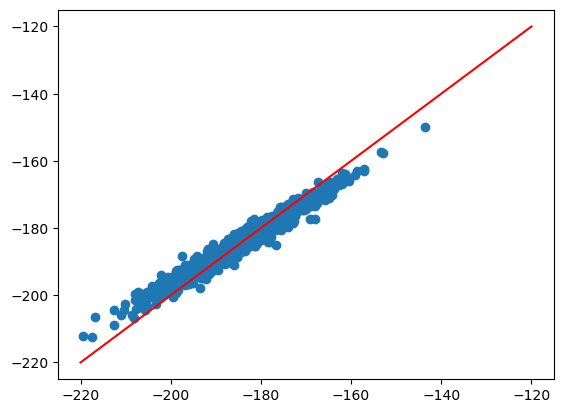

In [100]:
predictions = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/20230223/checkpoint/pred/prediction_mean.txt')
# test_predictions = model.predict(X_test).flatten()

plt.scatter(y_data, predictions)
plt.plot([-220,-120],[-220,-120],'r')

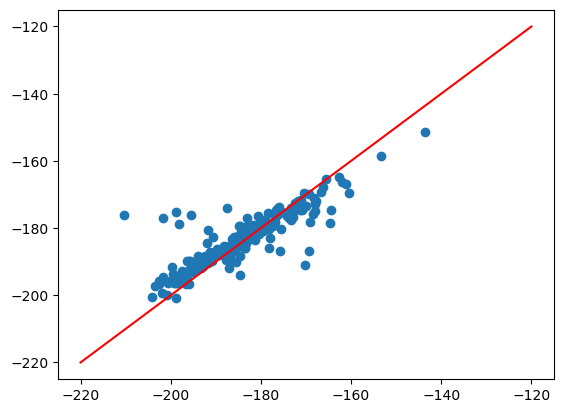

In [103]:
test_predictions = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/checkpoint/pred/prediction_mean.txt')
# test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.plot([-220,-120],[-220,-120],'r')

ValueError: x and y must be the same size

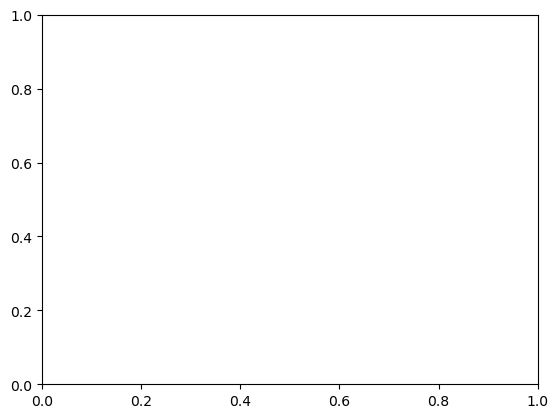

In [134]:
test_predictions2 = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/checkpoint/pred/prediction_mean.txt')
# test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions2)
# plt.plot([-220,-120],[-220,-120],'r')

In [113]:
# np.array(y_test - test_predictions2)
np.absolute(y_test,test_predictions2)

array([180.873, 188.305, 187.366, 191.249, 173.699, 177.344, 183.492,
       166.698, 185.445, 166.333, 181.475, 183.499, 178.837, 187.787,
       183.858, 184.527, 204.074, 196.024, 183.   , 169.263, 196.512,
       174.076, 191.104, 199.363, 194.009, 165.566, 191.797, 184.135,
       176.987, 178.234, 189.689, 186.445, 178.265, 187.157, 187.752,
       188.057, 180.825, 181.338, 183.859, 181.712, 192.402, 176.683,
       181.602, 160.524, 180.38 , 182.464, 198.571, 175.716, 180.978,
       192.869, 175.489, 193.046, 161.097, 178.373, 173.379, 161.985,
       196.433, 193.91 , 170.157, 196.364, 196.439, 183.372, 198.811,
       190.934, 183.541, 183.094, 171.576, 187.063, 187.329, 175.334,
       180.892, 184.72 , 186.241, 169.314, 179.565, 197.562, 191.766,
       191.919, 172.47 , 190.511, 169.028, 188.256, 183.031, 193.529,
       193.306, 193.389, 210.255, 188.117, 195.776, 196.619, 185.523,
       171.123, 185.785, 199.123, 184.943, 194.647, 185.044, 178.801,
       185.927, 195.

In [124]:
y_test.shape

(200,)

In [125]:
test_predictions2.shape

(200,)

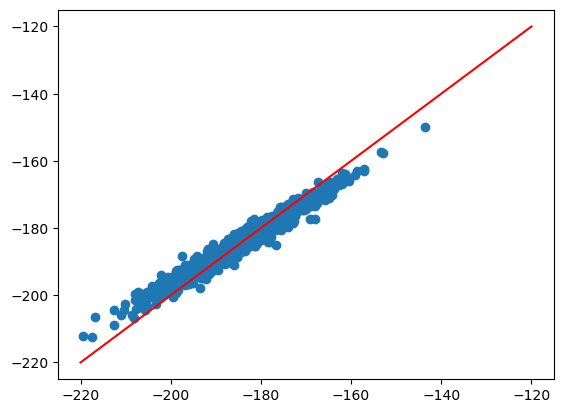

In [127]:
test_predictions2 = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/20230223/checkpoint/pred/prediction_mean.txt')
# test_predictions = model.predict(X_test).flatten()

plt.scatter(y_data, test_predictions2)
plt.plot([-220,-120],[-220,-120],'r')

In [140]:
true_y = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/20230223/myfile4.txt')
pred_y = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/checkpoint/pred/prediction_mean.txt')


In [138]:
pred_y.shape


(1000,)

In [130]:
true_y

array([-177.769, -178.234, -175.998, -208.002, -191.537, -180.578,
       -180.782, -185.579, -182.749, -187.194, -194.137, -200.238,
       -180.021, -174.409, -183.   , -180.679, -158.644, -184.747,
       -171.288, -172.733, -177.578, -186.442, -171.517, -184.625,
       -194.689, -176.901, -176.67 , -183.492, -192.762, -179.943,
       -186.614, -196.512, -197.889, -195.116, -194.481, -183.223,
       -196.304, -198.416, -188.142, -194.851, -195.141, -182.537,
       -184.593, -194.564, -170.423, -191.797, -175.76 , -191.181,
       -169.583, -184.668, -187.38 , -179.152, -175.269, -184.797,
       -199.306, -184.527, -163.748, -172.068, -189.903, -168.675,
       -199.679, -171.245, -176.386, -186.409, -195.202, -178.937,
       -182.629, -179.198, -179.312, -188.443, -192.366, -206.731,
       -186.156, -194.603, -201.459, -164.64 , -189.893, -169.263,
       -182.474, -174.322, -169.982, -178.25 , -176.053, -176.198,
       -201.206, -211.045, -172.924, -176.454, -181.771, -165.

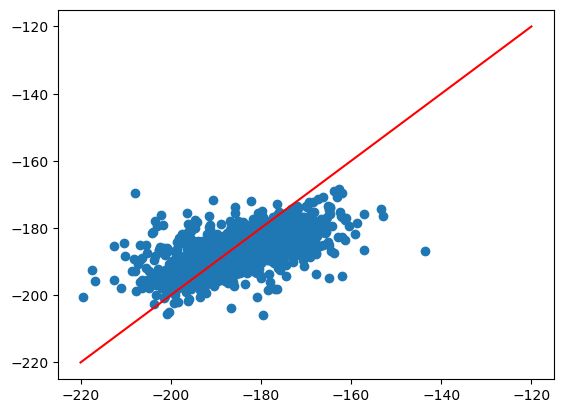

In [141]:
plt.scatter(true_y, pred_y)
plt.plot([-220,-120],[-220,-120],'r')

In [148]:
true_y = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/20230223/myfile4.txt')
pred_y = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/checkpoint/pred/prediction_mean.txt')

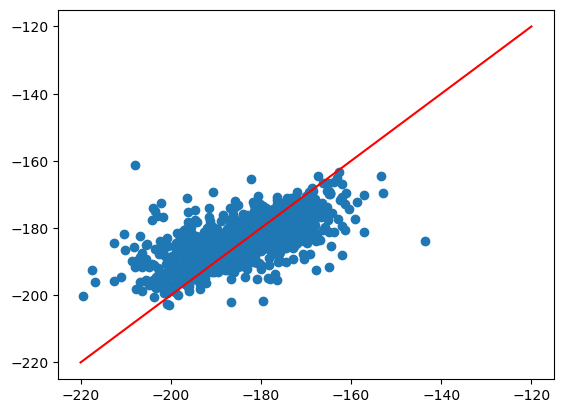

In [149]:
plt.scatter(true_y, pred_y)
plt.plot([-220,-120],[-220,-120],'r')